In [2]:
%matplotlib inline


# List of named colors

This plots a list of the named colors supported in matplotlib.
For more information on colors in matplotlib see

* the :doc:`/tutorials/colors/colors` tutorial;
* the `matplotlib.colors` API;
* the :doc:`/gallery/color/color_demo`.

## Helper Function for Plotting
First we define a helper function for making a table of colors, then we use it
on some common color categories.


In [3]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

## Base colors



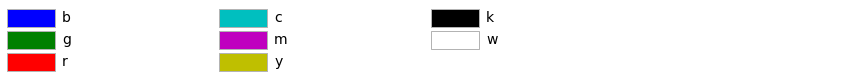

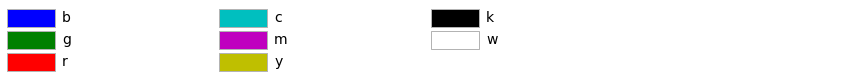

In [4]:
plot_colortable(mcolors.BASE_COLORS, sort_colors=False, emptycols=1)

## Tableau Palette



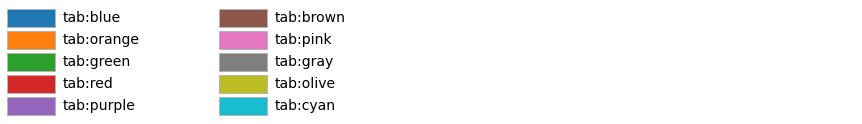

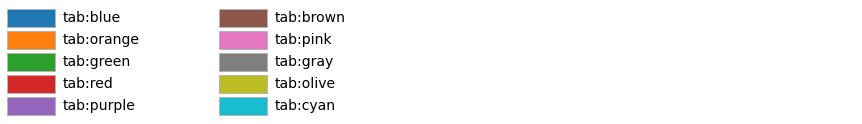

In [5]:
plot_colortable(mcolors.TABLEAU_COLORS, sort_colors=False, emptycols=2)

## CSS Colors



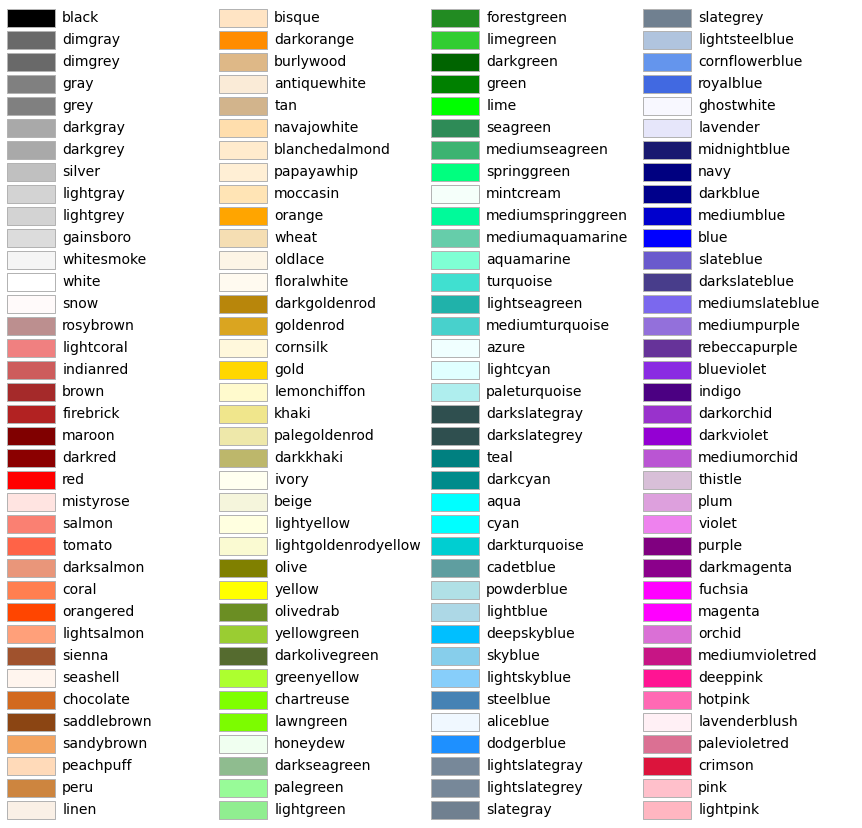

In [6]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

## XKCD Colors
XKCD colors are supported, but they produce a large figure, so we skip them
for now. You can use the following code if desired::

    xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
    xkcd_fig.savefig("XKCD_Colors.png")

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.colors`
   - `matplotlib.colors.rgb_to_hsv`
   - `matplotlib.colors.to_rgba`
   - `matplotlib.figure.Figure.get_size_inches`
   - `matplotlib.figure.Figure.subplots_adjust`
   - `matplotlib.axes.Axes.text`
   - `matplotlib.patches.Rectangle`



# colormap for matplotlib

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter

In [10]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

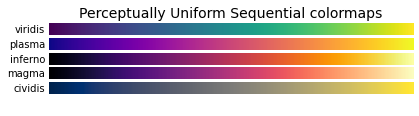

In [11]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])
                     

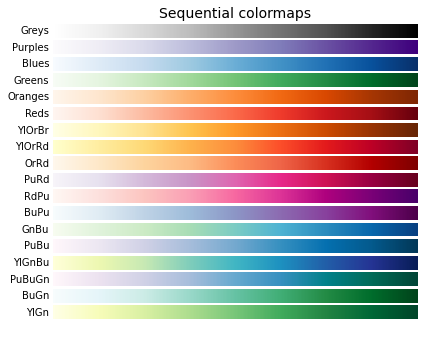

In [12]:
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

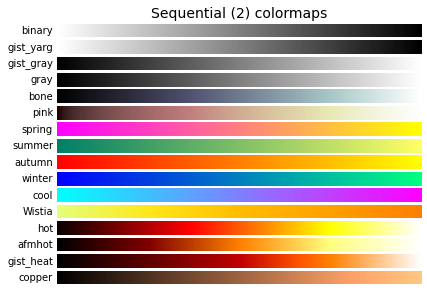

In [13]:
plot_color_gradients('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])

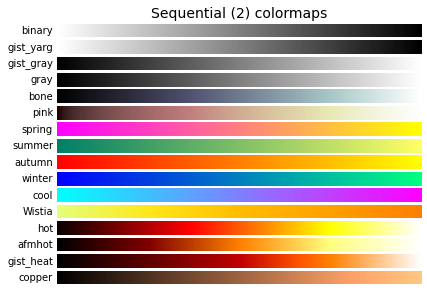

In [14]:
plot_color_gradients('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])

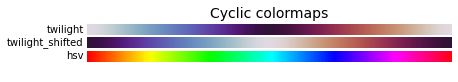

In [15]:
plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])

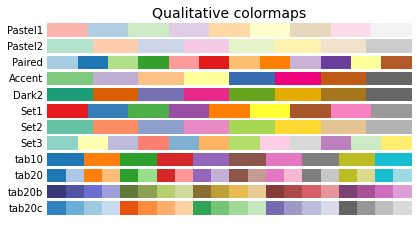

In [16]:
plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])

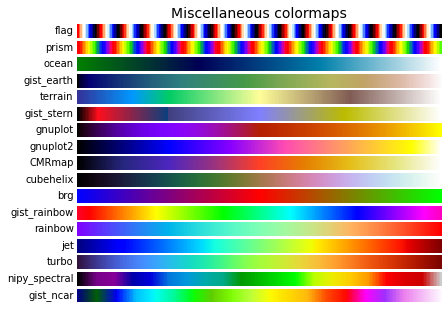

In [17]:
plot_color_gradients('Miscellaneous',
                     ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo', 'nipy_spectral', 'gist_ncar'])

plt.show()


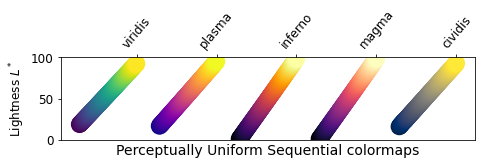

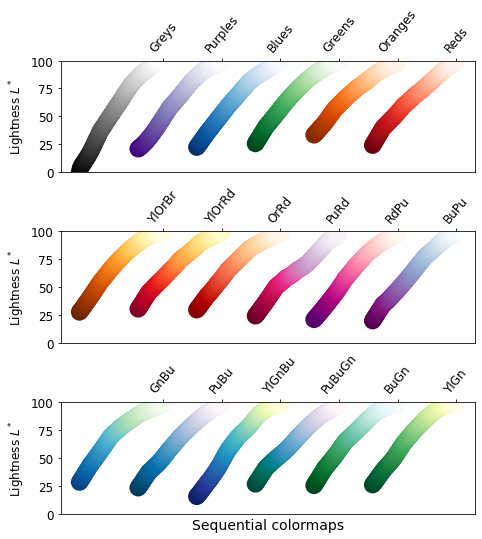

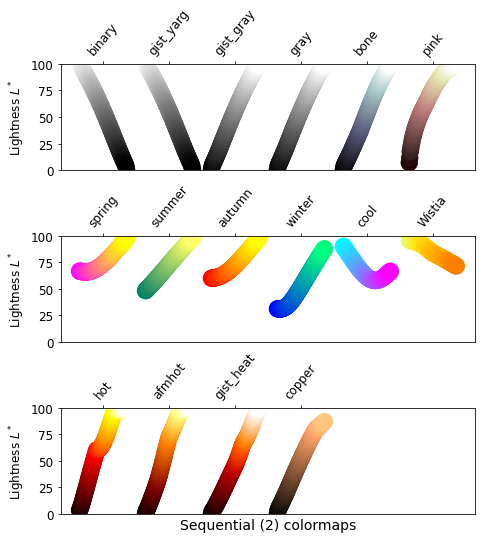

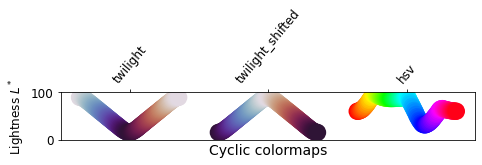

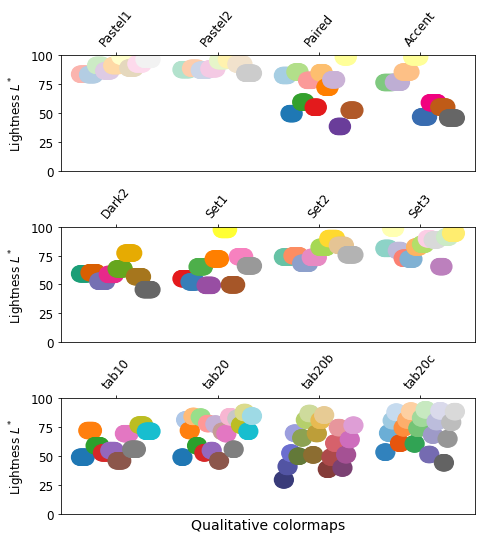

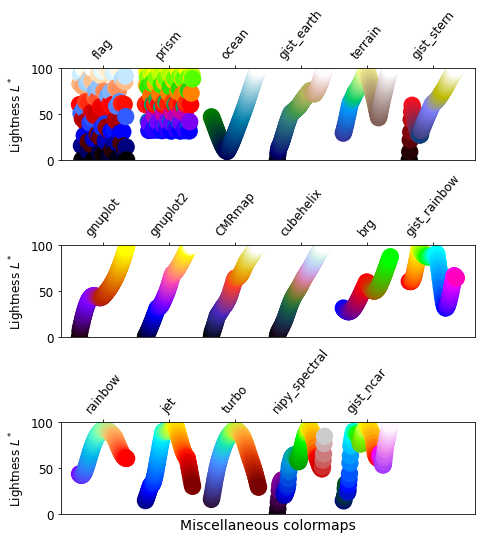

In [18]:
mpl.rcParams.update({'font.size': 12})

# Number of colormap per subplot for particular cmap categories
_DSUBS = {'Perceptually Uniform Sequential': 5, 'Sequential': 6,
          'Sequential (2)': 6, 'Diverging': 6, 'Cyclic': 3,
          'Qualitative': 4, 'Miscellaneous': 6}

# Spacing between the colormaps of a subplot
_DC = {'Perceptually Uniform Sequential': 1.4, 'Sequential': 0.7,
       'Sequential (2)': 1.4, 'Diverging': 1.4, 'Cyclic': 1.4,
       'Qualitative': 1.4, 'Miscellaneous': 1.4}

# Indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# Do plot
for cmap_category, cmap_list in cmaps.items():

    # Do subplots so that colormaps have enough space.
    # Default is 6 colormaps per subplot.
    dsub = _DSUBS.get(cmap_category, 6)
    nsubplots = int(np.ceil(len(cmap_list) / dsub))

    # squeeze=False to handle similarly the case of a single subplot
    fig, axs = plt.subplots(nrows=nsubplots, squeeze=False,
                            figsize=(7, 2.6*nsubplots))

    for i, ax in enumerate(axs.flat):

        locs = []  # locations for text labels

        for j, cmap in enumerate(cmap_list[i*dsub:(i+1)*dsub]):

            # Get RGB values for colormap and convert the colormap in
            # CAM02-UCS colorspace.  lab[0, :, 0] is the lightness.
            rgb = mpl.colormaps[cmap](x)[np.newaxis, :, :3]
            lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

            # Plot colormap L values.  Do separately for each category
            # so each plot can be pretty.  To make scatter markers change
            # color along plot:
            # https://stackoverflow.com/q/8202605/

            if cmap_category == 'Sequential':
                # These colormaps all start at high lightness but we want them
                # reversed to look nice in the plot, so reverse the order.
                y_ = lab[0, ::-1, 0]
                c_ = x[::-1]
            else:
                y_ = lab[0, :, 0]
                c_ = x

            dc = _DC.get(cmap_category, 1.4)  # cmaps horizontal spacing
            ax.scatter(x + j*dc, y_, c=c_, cmap=cmap, s=300, linewidths=0.0)

            # Store locations for colormap labels
            if cmap_category in ('Perceptually Uniform Sequential',
                                 'Sequential'):
                locs.append(x[-1] + j*dc)
            elif cmap_category in ('Diverging', 'Qualitative', 'Cyclic',
                                   'Miscellaneous', 'Sequential (2)'):
                locs.append(x[int(x.size/2.)] + j*dc)

        # Set up the axis limits:
        #   * the 1st subplot is used as a reference for the x-axis limits
        #   * lightness values goes from 0 to 100 (y-axis limits)
        ax.set_xlim(axs[0, 0].get_xlim())
        ax.set_ylim(0.0, 100.0)

        # Set up labels for colormaps
        ax.xaxis.set_ticks_position('top')
        ticker = mpl.ticker.FixedLocator(locs)
        ax.xaxis.set_major_locator(ticker)
        formatter = mpl.ticker.FixedFormatter(cmap_list[i*dsub:(i+1)*dsub])
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_tick_params(rotation=50)
        ax.set_ylabel('Lightness $L^*$', fontsize=12)

    ax.set_xlabel(cmap_category + ' colormaps', fontsize=14)

    fig.tight_layout(h_pad=0.0, pad=1.5)
    plt.show()

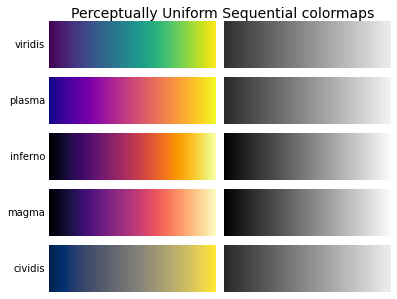

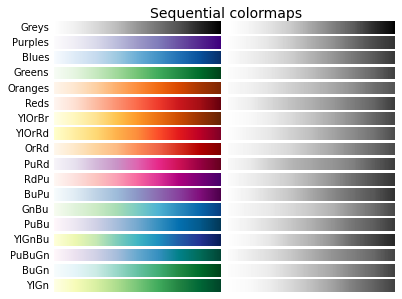

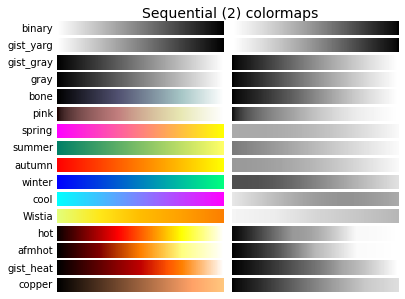

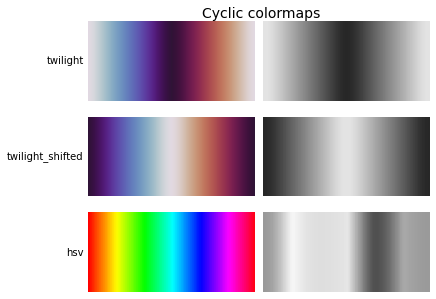

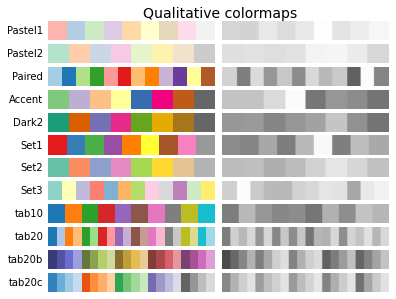

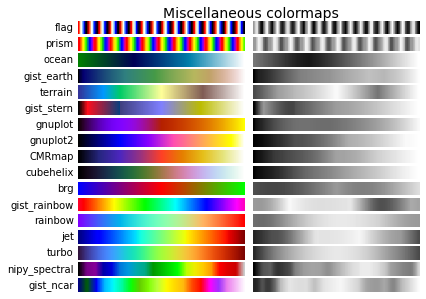

In [19]:
mpl.rcParams.update({'font.size': 14})

# Indices to step through colormap.
x = np.linspace(0.0, 1.0, 100)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    fig, axs = plt.subplots(nrows=len(cmap_list), ncols=2)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99,
                        wspace=0.05)
    fig.suptitle(cmap_category + ' colormaps', fontsize=14, y=1.0, x=0.6)

    for ax, name in zip(axs, cmap_list):

        # Get RGB values for colormap.
        rgb = mpl.colormaps[name](x)[np.newaxis, :, :3]

        # Get colormap in CAM02-UCS colorspace. We want the lightness.
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        L = lab[0, :, 0]
        L = np.float32(np.vstack((L, L, L)))

        ax[0].imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax[1].imshow(L, aspect='auto', cmap='binary_r', vmin=0., vmax=100.)
        pos = list(ax[0].get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs.flat:
        ax.set_axis_off()

    plt.show()


for cmap_category, cmap_list in cmaps.items():

    plot_color_gradients(cmap_category, cmap_list)